In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PySpectralETD import spectralETD

# 1D Advection-Diffusion Equation

The one-dimensional advection-diffusion equation is written as

$$ \frac{\partial \eta}{\partial t} = - u\frac{\partial \eta}{\partial x} + D \frac{\partial^2 \eta}{\partial x^2}$$
with $u$ being the velocity constant, $D$ being the diffusion coefficient, and $\eta$ represents the concentration field. The time derivative of the Fourier Transform $\widetilde{\eta}_{k}$ is 
$$\frac{\partial }{\partial t}\widetilde{\eta}_{k}(t) = -(i u k + D k^2)\widetilde{\eta}_{k}(t)$$
This case corresponds to the pseudo-spectral equation 
$$ \frac{\partial \widetilde{\eta}_{k}}{\partial t} = \widetilde{\mathcal{L}}_{k} \widetilde{\eta}_{k} + \widetilde{\mathcal{N}}_{k} (\eta(t))$$
 with the following operators given by 
$$\widetilde{\mathcal{L}}_{k} = -(i u k + D k^2), \quad \text{and} \quad \widetilde{\mathcal{N}}_{k} = 0$$
such that the time evolution has an analytical solution in the form
$$\widetilde{\eta}_{k}(t) = \widetilde{\eta}_{k}(0) e^{-(i u k + D k^2) t}$$

As an example, we set $u = 5$ and $D=0.01$. The size of the system is $L=2\pi$ with the number of gridpoints $N=2^{12} = 4096$. The initial profile is a top-hat function with length of $l=0.2$ and intensity of $\eta_0 = 1.0$ starting at $x_0 = -\pi$.

In [3]:
# diffusion-advection constants
D = 0.01
u = 5.0

In [4]:
DA = spectralETD(ndim=1,method='ETD',device='cuda')

Using dimensions: 1
Using method: ETD
Using device: cuda


In [5]:
L = 2*np.pi
Ngrid = 2048
DA.Set_Geometry(lengths=L,gridsize=Ngrid)
x = DA.x

In [6]:
# The linear terms of PDE
def Loperator_k(params):
    u,D,Kx,K2 = params
    return -1.0j*Kx*u-D*K2

params = u,D,DA.Kx,DA.K2
DA.Set_LinearOperator(Loperator_k,params)

In [7]:
# The non-linear terms of PDE (with dealising)
DA.Set_NonLinearOperator(None,params)

In [8]:
DA.Set_TimeStep(h=0.01)

Using time step: 0.01


## Calculating the Dynamics

In [19]:
T = 1.0 # total time

# Setting Initial condition
n0 = np.zeros(DA.Ngrid[0],dtype=np.float32) 
l = int(0.2/DA.dx[0])
n0[:l] = 1.0 
DA.Set_Field(n0)

# Calculate the dynamics
# ti: initial time, tf: final time, print_every: how often to print progress
# The output is a tuple (t, n) where t is the time array and n is the field array
t, n = DA.Calculate_Dynamics(ti=0.0, tf=T, print_every=1) 

Step 1, Time: 0.01
Step 2, Time: 0.02
Step 3, Time: 0.03
Step 4, Time: 0.04
Step 5, Time: 0.05
Step 6, Time: 0.06
Step 7, Time: 0.07
Step 8, Time: 0.08
Step 9, Time: 0.09
Step 10, Time: 0.10
Step 11, Time: 0.11
Step 12, Time: 0.12
Step 13, Time: 0.13
Step 14, Time: 0.14
Step 15, Time: 0.15
Step 16, Time: 0.16
Step 17, Time: 0.17
Step 18, Time: 0.18
Step 19, Time: 0.19
Step 20, Time: 0.20
Step 21, Time: 0.21
Step 22, Time: 0.22
Step 23, Time: 0.23
Step 24, Time: 0.24
Step 25, Time: 0.25
Step 26, Time: 0.26
Step 27, Time: 0.27
Step 28, Time: 0.28
Step 29, Time: 0.29
Step 30, Time: 0.30
Step 31, Time: 0.31
Step 32, Time: 0.32
Step 33, Time: 0.33
Step 34, Time: 0.34
Step 35, Time: 0.35
Step 36, Time: 0.36
Step 37, Time: 0.37
Step 38, Time: 0.38
Step 39, Time: 0.39
Step 40, Time: 0.40
Step 41, Time: 0.41
Step 42, Time: 0.42
Step 43, Time: 0.43
Step 44, Time: 0.44
Step 45, Time: 0.45
Step 46, Time: 0.46
Step 47, Time: 0.47
Step 48, Time: 0.48
Step 49, Time: 0.49
Step 50, Time: 0.50
Step 51, 

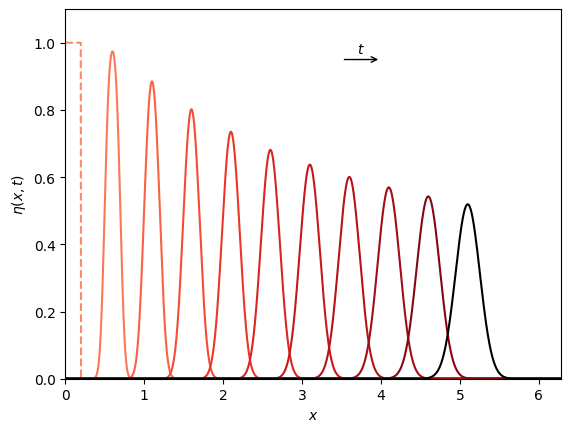

In [27]:
fig, ax = plt.subplots(1,1)

Nsteps = t.size

my_map = plt.get_cmap('Reds')
color = my_map(np.linspace(0.4,1.0,Nsteps))
plt.plot(x,n[0],'--',color=color[0])
for i in range(1,Nsteps//10):
    plt.plot(x,n[10*i],'-',color=color[10*i])
plt.plot(x,n[-1],'-k')
plt.xlabel(r'$x$')
plt.ylabel(r'$\eta(x,t)$')
plt.annotate("", xy=(4, 0.95), xytext=(3.5, 0.95),
            arrowprops=dict(arrowstyle="->"))
plt.text(3.7,0.97,r"$t$")
plt.xlim(0.0,2*np.pi)
plt.ylim(0.,1.1)
fig.savefig('../outputs/diffusion_advection.pdf')

# Generating a MP4 video

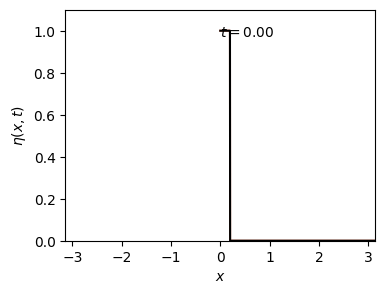

In [28]:
from matplotlib import animation

my_map = plt.get_cmap('Reds')
color = my_map(np.linspace(0.4,1.0,Nsteps))
def animate(i):
    ax.clear()
    for j in range(i+1):
        ax.plot(x,n[j],'-',color=color[j])
    ax.plot(x,n[i],'-k')
    ax.text(0.0,0.97,fr'$t={t[i]:.2f}$')
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(0.0,1.1)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\eta(x,t)$')
    return fig,
    
fig, ax = plt.subplots(1,1,figsize=(4,3))
ani = animation.FuncAnimation(fig, animate, frames= Nsteps,
                               interval = 50)
writervideo = animation.FFMpegWriter(fps=10, metadata=dict(artist='Me'))
# Save the animation as a video file
# Make sure you have ffmpeg installed in your system
# You can install it via conda or apt-get
# conda install -c conda-forge ffmpeg
# sudo apt-get install ffmpeg
# or you can use pip install imageio[ffmpeg]
ani.save('../outputs/diffusion_advection.mp4',writer=writervideo,dpi=200)